# Prova 

Isabella Menezes Ramos 3474

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
df = pd.read_csv('seguro-saude.csv')
df

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

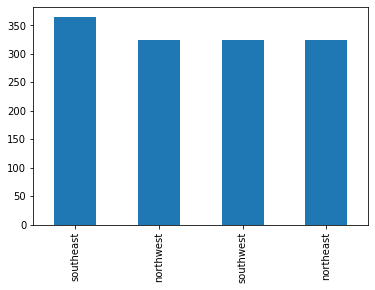

In [15]:
# 1. (2 pontos) Quantas pessoas de cada região existem? Faça um gráfico de barras para ilustrar a 
# quantidade de pessoas por região

a = df['regiao'].value_counts()
a.plot.bar()


In [18]:
# 2. (2 pontos) Uma mulher que paga 30000 de seguro, está a quantos desvios padrões da média das 
# outras mulheres?

In [17]:
mulheres = df[df['sexo'] == 'female']
mulheres

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [20]:
def get_zscore(array, value):
    media = array.mean()
    desvio_padrao = array.std()
    return (value-media)/desvio_padrao
    
distancia = get_zscore(mulheres['valor_seguro'], 30000)
print('Uma mulher está', round(distancia, 4), 'desvios padrões da média de outras mulheres!')

Uma mulher está 1.5663 desvios padrões da média de outras mulheres!


In [21]:
# 3. (3 ponto) Faça um gráfico com o histograma do valor do seguro, contendo separadamente as 
# distribuições para homens e mulheres.

mulheres = df[df['sexo'] == 'female']
homens = df[df['sexo'] == 'male']

<AxesSubplot:>

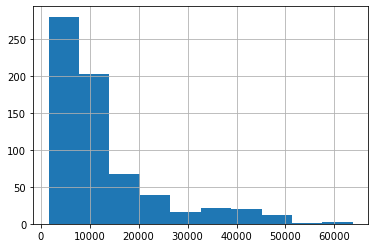

In [25]:
mulheres['valor_seguro'].hist()


<AxesSubplot:>

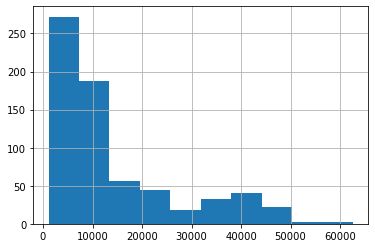

In [23]:
homens['valor_seguro'].hist()

(array([280., 203.,  67.,  39.,  16.,  22.,  20.,  12.,   1.,   2.]),
 array([ 1607.5101  ,  7823.801891, 14040.093682, 20256.385473,
        26472.677264, 32688.969055, 38905.260846, 45121.552637,
        51337.844428, 57554.136219, 63770.42801 ]),
 <BarContainer object of 10 artists>)

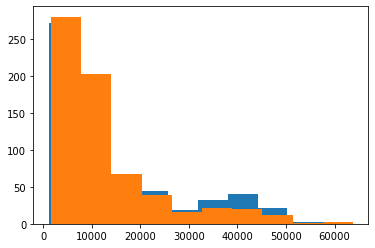

In [32]:
plt.hist(homens['valor_seguro'])
plt.hist(mulheres['valor_seguro'])

In [26]:
# 4. (3 ponto) Calcule o intervalo de confiança dos valores pagos de seguro para homens e para 
# mulheres. Faça um gráfico mostrando esses intervalos.

def confidence_interval(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    print("Erro padrao %.3f " % std_error)
    print("Intervalo de confiança: [%.3f - %.3f] " % ((mean-(1.96*std_error)),(mean+(1.96*std_error))))
    return mean,1.96*std_error

In [30]:
seguro_homens_a, seguro_homens_b = confidence_interval(homens['valor_seguro'])

Erro padrao 498.886 
Intervalo de confiança: [12978.935 - 14934.567] 


In [29]:
seguro_mulheres_a, seguro_mulheres_b = confidence_interval(mulheres['valor_seguro'])

Erro padrao 432.529 
Intervalo de confiança: [11721.821 - 13417.336] 


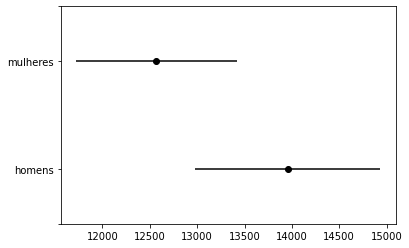

In [31]:
x = [seguro_homens_a, seguro_mulheres_a]
y = [1, 3]
errors = [seguro_homens_b, seguro_mulheres_b]

plt.figure()
plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
plt.yticks((0, 1, 3, 4), ('', 'homens', 'mulheres','')) 
plt.show()

In [36]:
# 5. (3 ponto) Utilize um teste de hipótese para verificar se a média de valor pago pelas mulheres é 
# igual ou diferente da média do valor pago pelos homens.

def str_error_diff_mean(data1, data2):
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    n1=len(data1)
    n2=len(data2)
    std_error_diff=np.sqrt((np.power(std1,2)/n1) + (np.power(std2,2)/n2))
    diff_mean=(mean1-mean2)
    print("Diferenças: %.3f " % diff_mean)
    print("Erro Padrão das Diferenças: %.3f " % std_error_diff)
    return(diff_mean/std_error_diff)

std_error_diff=str_error_diff_mean(homens['valor_seguro'],mulheres['valor_seguro'])
alpha=0.05
p_value_normal = (st.norm.cdf(std_error_diff))
print("(Normal) valor-p= %.3f " % p_value_normal)
if(p_value_normal < alpha):
  print("Hipótese nula pode ser rejeitada")
else:
  print("Não podemos rejeitar a hipótese nula")


Diferenças: 1387.172 
Erro Padrão das Diferenças: 660.279 
(Normal) valor-p= 0.982 
Não podemos rejeitar a hipótese nula


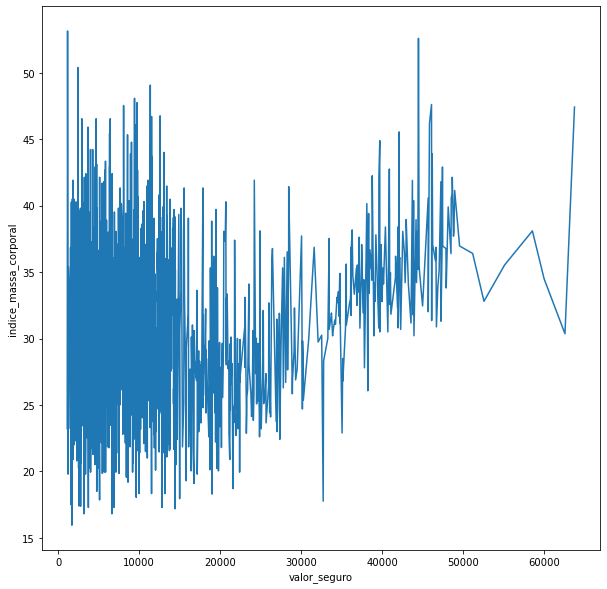

In [48]:
# 6. (2 pontos) Faça um gráfico mostrando a relação entre o índice de massa corporal e o valor de 
# seguro pago.
plt.figure(figsize=(10,10))
g=sns.lineplot(data=df,y="indice_massa_corporal",x="valor_seguro")
plt.show()


Distribuição da massa corporal:


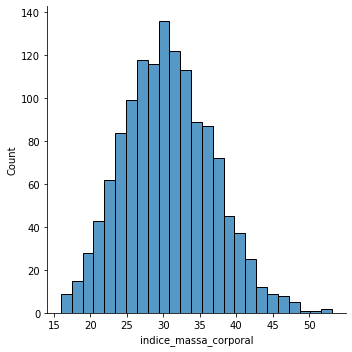

Sim, segue uma distribuição normal.


In [50]:
# 7. (3 pontos) O índice de massa corporal das pessoas segue uma distribuição normal?

print('Distribuição da massa corporal:')
sns.displot(df['indice_massa_corporal'])
plt.show()
print("Sim, segue uma distribuição normal.")

In [52]:
# 8. (3 pontos) Faça o Boxplot do valor do seguro pago, separadamente para fumantes e não-fumantes.

fumantes = df[df['fumante'] == 'yes']
nao_fumantes = df[df['fumante'] == 'no']

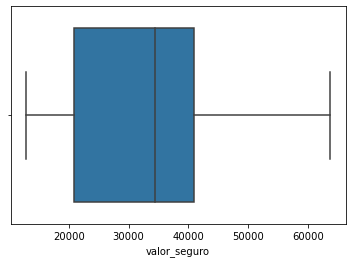

In [58]:
ax = sns.boxplot(x=fumantes['valor_seguro'])

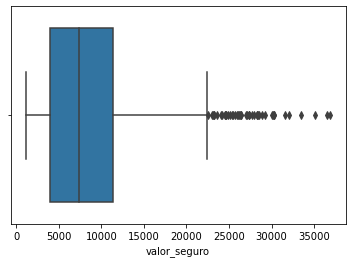

In [59]:
ax = sns.boxplot(x=nao_fumantes['valor_seguro'])

In [65]:
# 9. (4 pontos) Considerando as regras de associação, em que cada pessoa pode ser tratada como uma 
# “transação”, e os valores de “fumante”, “sexo” e “região” como itens, responda:
# Dica: Você pode transformar o dataframe em um conjunto de transações e executar o algoritmo 
# Apriori, ou calcular os valores das métricas manualmente.
# a) Qual o Suporte para o itemset de mulheres não fumantes?
# b) Qual o Suporte para o itemset de homens não fumantes?
# c) Qual o Suporte da regra {Mulheres de northwest} → {Não Fumantes}?
# d) Qual a confiança da regra {Mulheres de northwest} → {Não Fumantes}

In [204]:
new_df = df.loc[:,['fumante','sexo','regiao']]
observations = [] 
for i in range(len(new_df)):
    observations.append([str(new_df.values[i,j]) for j in range(3)])

from apyori import apriori
associations = apriori(observations,min_support = 0.1)

In [205]:
associations = list(associations)
associations

[RelationRecord(items=frozenset({'female'}), support=0.4947683109118087, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'female'}), confidence=0.4947683109118087, lift=1.0)]),
 RelationRecord(items=frozenset({'male'}), support=0.5052316890881914, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'male'}), confidence=0.5052316890881914, lift=1.0)]),
 RelationRecord(items=frozenset({'no'}), support=0.7952167414050823, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'no'}), confidence=0.7952167414050823, lift=1.0)]),
 RelationRecord(items=frozenset({'northeast'}), support=0.242152466367713, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'northeast'}), confidence=0.242152466367713, lift=1.0)]),
 RelationRecord(items=frozenset({'northwest'}), support=0.2428998505231689, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'north

In [208]:
print("A: support=0.40881913303437967")
print("B: support=0.3863976083707025")
print("C: support=0.10089686098654709") 
print("D: confidence=0.10089686098654709")

A: support=0.40881913303437967
B: support=0.3863976083707025
C: support=0.10089686098654709
D: confidence=0.10089686098654709
